# Debugging the creativity parameter

In [1]:
%reload_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore') 

import rdkit
import dgym as dg

# load all data
path = '../../dgym-data'

reactions = dg.ReactionCollection.from_json(
    path = f'{path}/All_Rxns_rxn_library_sorted.json',
    smarts_col = 'reaction_string',
    classes_col = 'functional_groups'
)

building_blocks = dg.datasets.disk_loader(f'{path}/Enamine_Building_Blocks_Stock_262336cmpd_20230630.sdf')
fingerprints = dg.datasets.fingerprints(f'{path}/Enamine_Building_Blocks_Stock_262336cmpd_20230630_atoms.fpb')

import torch
import pyarrow.parquet as pq
table = pq.read_table('../../dgym-data/sizes.parquet')[0]
sizes = torch.tensor(table.to_numpy())

In [2]:
from dgym.envs.designer import Designer, Generator

designer = Designer(
    Generator(building_blocks, fingerprints, sizes),
    reactions,
    cache = True
)

In [17]:
start = designer.design(1)[0]

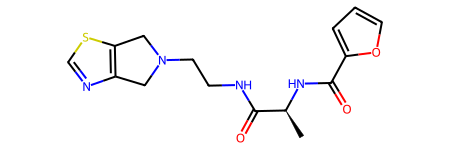

In [63]:
designer.design(start, 1, temperature=1.0)[0]

In [72]:
route = start.dump()

In [82]:
from copy import deepcopy
from itertools import combinations

kwargs = {}
annotations = {'search': 'similar'}
paths = designer._flatten_route(route)

limit = 2
reactant_variants = []
for combo in combinations(paths, limit):
    new_tree = deepcopy(route)
    for path in combo:
        new_tree = designer._apply_annotation_to_path(
            new_tree, path, annotations, **kwargs)
    reactant_variants.append(new_tree)

In [88]:
min(len(paths), 4)

2